In [36]:
from citipy import citipy
import random
import requests
import json
from latsandlongs import lats, lngs
from api_keys import openweather
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

In [6]:
#latitudes = []
#longitudes = []

#I ran this once and saved the results to another file to keep the same results

#for n in range(0, 700):
#    latitudes.append(random.uniform(-90, 90))
#    longitudes.append(random.uniform(-180, 180))
print(len(lats))
print(len(lngs))
print(lats)
print(lngs)

700
700
[-50.80717039156833, -44.36905217562752, 42.44974679333919, -22.548957173457453, -58.5885193469449, 69.67404576081688, 63.68353845336574, 34.27863321202399, -42.46129470990575, 52.158564718131714, 85.76664368441567, 72.40441809094088, -36.872254148276596, -55.88353145945188, -5.324440470271668, 19.26854347867173, 71.81189142015887, 19.90920355317519, -84.86819501361082, -10.477945514865809, -32.34863535950861, 24.926174100322882, -21.486768288977288, -87.74822071448281, 68.9418786076003, -37.547351869189264, 32.25631454261256, -3.3541646985901536, 5.756301338513438, 5.532158743399833, 83.07099549892013, 22.203371504237523, 65.48279715894765, -83.61207402169086, 20.548659418463956, -37.03397209392788, 13.557717521862926, 64.1554711205238, 67.61075189662023, 22.73625758196701, 11.694307674060866, -86.71732840470631, 18.153205700029446, -64.99785879044364, -43.105180213313446, -66.39375857604814, -78.86900684628787, 82.25829897334745, 48.58635429134321, -40.056841973000466, 76.870

In [3]:
#print(latitudes)
#print(longitudes)

In [7]:
city_list = []
for x, y in zip(lats, lngs):
    city = citipy.nearest_city(x, y)
    country = city.country_code
    city = city.city_name
    tup = (city, country)
    city_list.append(tup)
    
    
    
print(len(city_list))

print(city_list) 

700
[('tsihombe', 'mg'), ('taolanaro', 'mg'), ('burgos', 'es'), ('messina', 'za'), ('hobart', 'au'), ('belushya guba', 'ru'), ('maniitsoq', 'gl'), ('lasa', 'cn'), ('castro', 'cl'), ('langham', 'ca'), ('barentsburg', 'sj'), ('upernavik', 'gl'), ('rikitea', 'pf'), ('rikitea', 'pf'), ('georgetown', 'sh'), ('constitucion', 'mx'), ('clyde river', 'ca'), ('hidalgo', 'mx'), ('bluff', 'nz'), ('coruripe', 'br'), ('vaini', 'to'), ('sharjah', 'ae'), ('jamestown', 'sh'), ('hobart', 'au'), ('iskateley', 'ru'), ('jamestown', 'sh'), ('fortuna', 'us'), ('georgetown', 'sh'), ('atuona', 'pf'), ('cabo san lucas', 'mx'), ('tuktoyaktuk', 'ca'), ('gat', 'ly'), ('thompson', 'ca'), ('bluff', 'nz'), ('katsuura', 'jp'), ('dolores', 'ar'), ('cayenne', 'gf'), ('almaznyy', 'ru'), ('kautokeino', 'no'), ('begampur', 'in'), ('butaritari', 'ki'), ('ushuaia', 'ar'), ('tombouctou', 'ml'), ('cape town', 'za'), ('east london', 'za'), ('ushuaia', 'ar'), ('vaini', 'to'), ('illoqqortoormiut', 'gl'), ('fruitvale', 'ca'), ('ma

In [8]:
#url = "http://api.openweathermap.org/data/2.5/weather?"
#city = "London"
city_name = city_list[2][0]
country_code = city_list[2][1]

print(city_name)
print(country_code)

# Build query URL
#query_url = url + "appid=" + api_key + "&q=" + city

url = f"http://api.openweathermap.org/data/2.5/weather?q={city_name},{country_code}&appid={openweather}&units=imperial"

#url ="api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=b8955f7da2194da93b48f9c32e6ade74"

print(url)

weather_response = requests.get(url)
weather_json = weather_response.json()

weather_json

burgos
es
http://api.openweathermap.org/data/2.5/weather?q=burgos,es&appid=b8955f7da2194da93b48f9c32e6ade74&units=imperial


{'coord': {'lon': -3.7079, 'lat': 42.3394},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 72.61,
  'feels_like': 73.94,
  'temp_min': 43.16,
  'temp_max': 72.61,
  'pressure': 1014,
  'humidity': 93},
 'visibility': 4500,
 'wind': {'speed': 16.11, 'deg': 210},
 'rain': {'1h': 0.14},
 'clouds': {'all': 90},
 'dt': 1620910091,
 'sys': {'type': 1,
  'id': 6396,
  'country': 'ES',
  'sunrise': 1620881731,
  'sunset': 1620934018},
 'timezone': 7200,
 'id': 3127460,
 'name': 'Burgos',
 'cod': 200}

In [12]:
pd.json_normalize(weather_json)

,weather,base,visibility,dt,timezone,id,name,cod,coord.lon,coord.lat,...,main.humidity,wind.speed,wind.deg,rain.1h,clouds.all,sys.type,sys.id,sys.country,sys.sunrise,sys.sunset
0,"[{'id': 500, 'main': 'Rain', 'description': 'l...",stations,4500,1620910091,7200,3127460,Burgos,200,-3.7079,42.3394,...,93,16.11,210,0.14,90,1,6396,ES,1620881731,1620934018


In [26]:
#KeyError
print(weather_json['main']['temp'])
weather_json['coord']['lat']

43.92


42.3394

In [13]:
df_list = []

for c in city_list:
    city_name = c[0]
    country_code = c[1]
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city_name},{country_code}&appid={openweather}&units=imperial"
    weather_response = requests.get(url)
    weather_json = weather_response.json()

    df = pd.json_normalize(weather_json)
    df_list.append(df)
    
#    try:
#        plot_lats.append(weather_json['coord']['lat'])
#    except KeyError:
#        pass
    
#    try:
#        plot_temps.append(weather_json['main']['temp'])
#    except KeyError:
#        pass  

In [17]:
df = pd.concat(df_list)
df = df[df['dt'].notna()]


In [20]:
print(df.columns)
df.head()

Index(['cod', 'message', 'weather', 'base', 'visibility', 'dt', 'timezone',
       'id', 'name', 'coord.lon', 'coord.lat', 'main.temp', 'main.feels_like',
       'main.temp_min', 'main.temp_max', 'main.pressure', 'main.humidity',
       'wind.speed', 'wind.deg', 'rain.1h', 'clouds.all', 'sys.type', 'sys.id',
       'sys.country', 'sys.sunrise', 'sys.sunset', 'main.sea_level',
       'main.grnd_level', 'wind.gust', 'snow.1h'],
      dtype='object')


,cod,message,weather,base,visibility,dt,timezone,id,name,coord.lon,...,clouds.all,sys.type,sys.id,sys.country,sys.sunrise,sys.sunset,main.sea_level,main.grnd_level,wind.gust,snow.1h
0,200,NaN,"[{'id': 500, 'main': 'Rain', 'description': 'l...",stations,4500.0,1.620910e+09,7200.0,3127460.0,Burgos,-3.7079,...,90.0,1.0,6396.0,ES,1.620882e+09,1.620934e+09,NaN,NaN,NaN,NaN
0,200,NaN,"[{'id': 800, 'main': 'Clear', 'description': '...",stations,10000.0,1.620910e+09,7200.0,976885.0,Messina,30.0396,...,0.0,NaN,NaN,ZA,1.620880e+09,1.620920e+09,1016.0,957.0,10.27,NaN
0,200,NaN,"[{'id': 801, 'main': 'Clouds', 'description': ...",stations,10000.0,1.620910e+09,36000.0,2163355.0,Hobart,147.3294,...,20.0,2.0,2002195.0,AU,1.620854e+09,1.620889e+09,NaN,NaN,5.01,NaN
0,200,NaN,"[{'id': 801, 'main': 'Clouds', 'description': ...",stations,10000.0,1.620910e+09,-7200.0,3421982.0,Maniitsoq,-52.9000,...,15.0,NaN,NaN,GL,1.620886e+09,1.620953e+09,1021.0,1017.0,2.08,NaN
0,200,NaN,"[{'id': 804, 'main': 'Clouds', 'description': ...",stations,10000.0,1.620910e+09,-14400.0,3896218.0,Castro,-73.7732,...,99.0,2.0,2033606.0,CL,1.620907e+09,1.620942e+09,1018.0,1012.0,1.21,NaN


In [5]:
#It's a match
#print(len(plot_temps))
#len(plot_lats)

0


0

In [21]:
plot_lats = df['coord.lat'].tolist()
plot_temps = df['main.temp'].tolist()

In [ ]:
north_df = df.loc[df["coord.lat"] > 0, :]
south_df = df.loc[df["coord.lat"] < 0, :]

In [52]:
#just to prove they imported
#print(plot_temps)
#print(plot_lats)
nlats = north_df['coord.lat']
ntemps = north_df['main.temp']

slats = south_df['coord.lat']
stemps = south_df['main.temp']

temps = [(nlats, ntemps, 30), (slats,stemps, -50)]

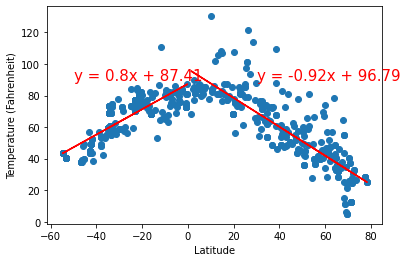

In [53]:
plt.scatter(plot_lats, plot_temps)
#(nslope, nintercept, nrvalue, npvalue, nstderr) = linregress(nlats, ntemps)
#nregress_values = nlats * nslope + nintercept
#line_eq = "y = " + str(round(nslope,2)) + "x + " + str(round(nintercept,2))
#plt.annotate(line_eq,(0,90),fontsize=15,color="red")
#plt.plot(nlats,nregress_values,"r-")
for n in temps:
    (nslope, nintercept, nrvalue, npvalue, nstderr) = linregress(n[0], n[1])
    nregress_values = n[0] * nslope + nintercept
    line_eq = "y = " + str(round(nslope,2)) + "x + " + str(round(nintercept,2))
    plt.annotate(line_eq,(n[2],90),fontsize=15,color="red")
    plt.plot(n[0],nregress_values,"r-")


plt.xlabel('Latitude')
plt.ylabel('Temperature (Fahrenheit)')
plt.show()
#This scatter plot shows the temperature based on how north and south the cities are

In [ ]:
nlats = north_df['coord.lat']
ntemps = north_df['main.humidity']

slats = south_df['coord.lat']
stemps = south_df['main.humidity']

temps = [(nlats, ntemps, 30), (slats,stemps, -50)]

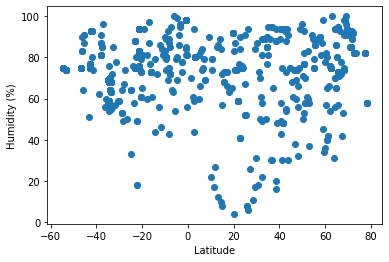

In [28]:
plot_hum = df['main.humidity'].tolist()
plt.scatter(plot_lats, plot_hum)

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()
#Similar to the first plot only with humidity instead of temperature

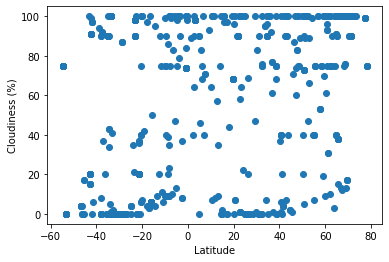

In [26]:
plot_cloud = df['clouds.all'].tolist()
plt.scatter(plot_lats, plot_cloud)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()
#cloud cover for each city based on their latitude

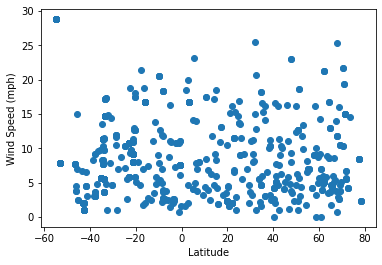

In [27]:
plot_wind = df['wind.speed'].tolist()
plt.scatter(plot_lats, plot_wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
#wind speed based on latitude

In [31]:
north_df = df.loc[df["coord.lat"] > 0, :]
south_df = df.loc[df["coord.lat"] < 0, :]
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")